Юдин Александр 23.М08

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [ ]:
class LogReg():
  def __init__(self, n, learning_rate=0.01, num_iterations=2000, alpha=0.01):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.alpha = alpha
    self.w = self.random_initialize_weights(n)

  def random_initialize_weights(self, n, mean=0, std=1):
    return np.random.normal(mean, std, n)

  def predict(self, X):
    probabilities = 1 / (1 + np.exp(-X.dot(self.w)))
    return (probabilities > 0.5).astype(int)

  def fit(self, X, y):
    m, n = X.shape
    for i in range(self.num_iterations):
      y_pred = self.predict(X)

      error = y_pred - y # Вычисляем ошибку предсказания

      # Градиент с регуляризацией L2
      gradient = (1 / m) * (X.T.dot(error) + 2 * self.alpha * self.w)

      gradient[0] = 0  # Не регуляризуем начальное смещение
      # Обновляем веса с учетом градиента
      self.w = self.w - self.learning_rate * gradient

  def score(self, X, y):
    y_pred = self.predict(X)
    accuracy = np.sum(y_pred == y) / len(y)
    return accuracy

Считываем обучающую выборку.

Описание датасета:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. restbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - have disease or not (1=yes, 0=no)

In [ ]:
df = pd.read_csv('/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

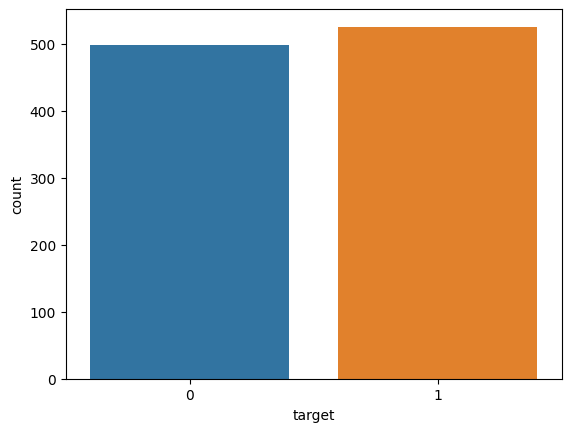

In [ ]:
sns.countplot(x="target", data=df)
plt.show()

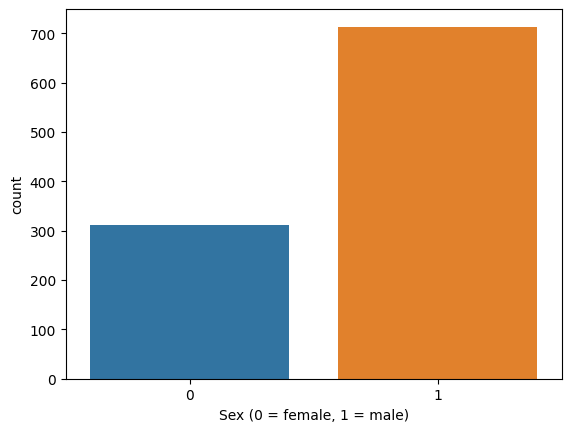

In [ ]:
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


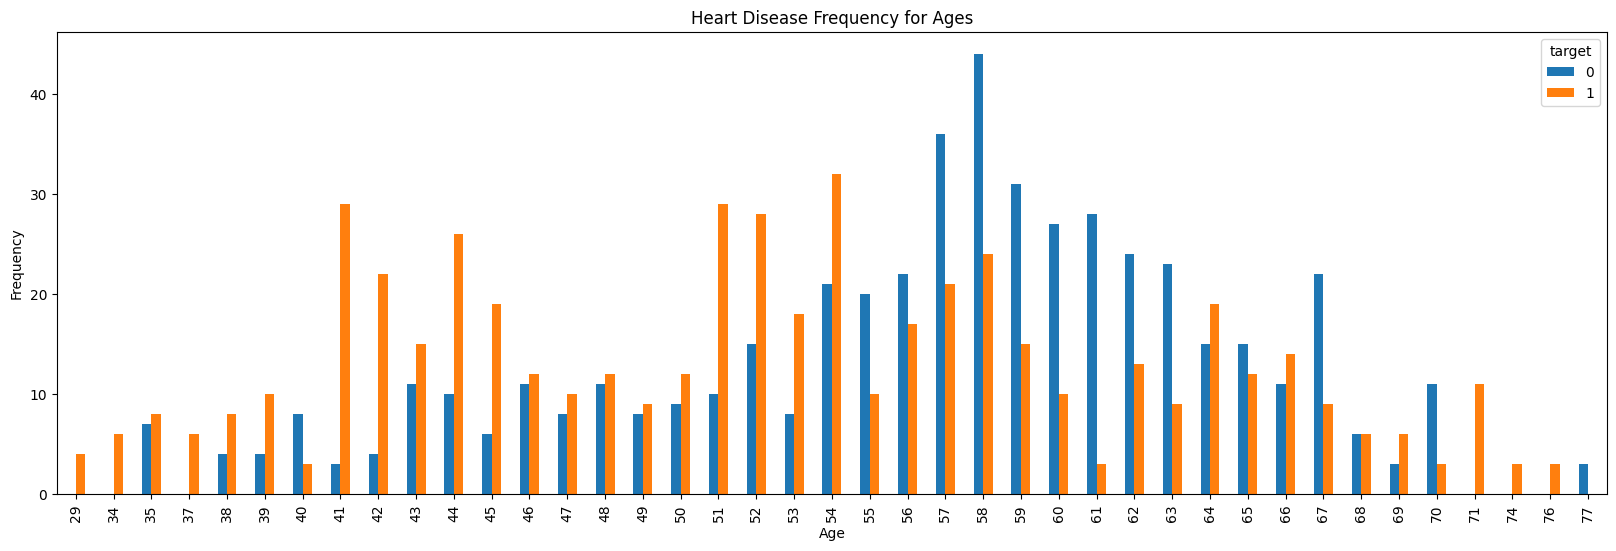

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

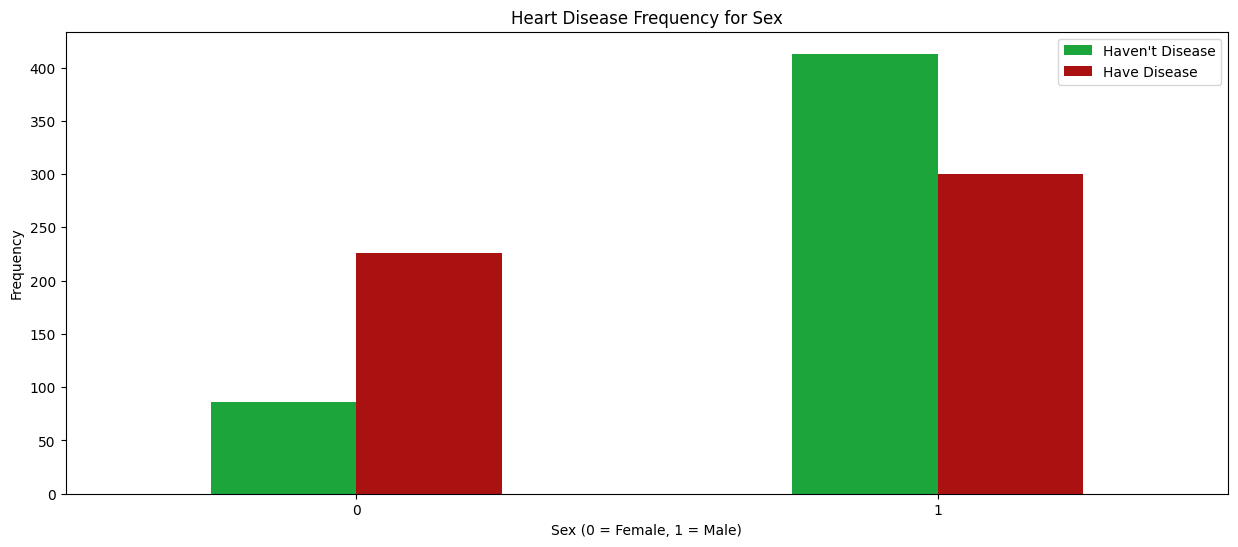

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

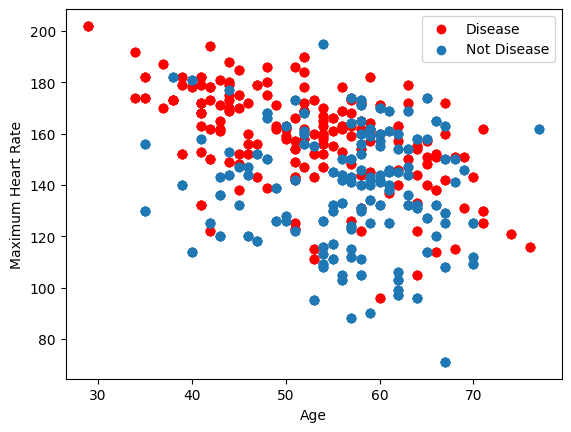

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

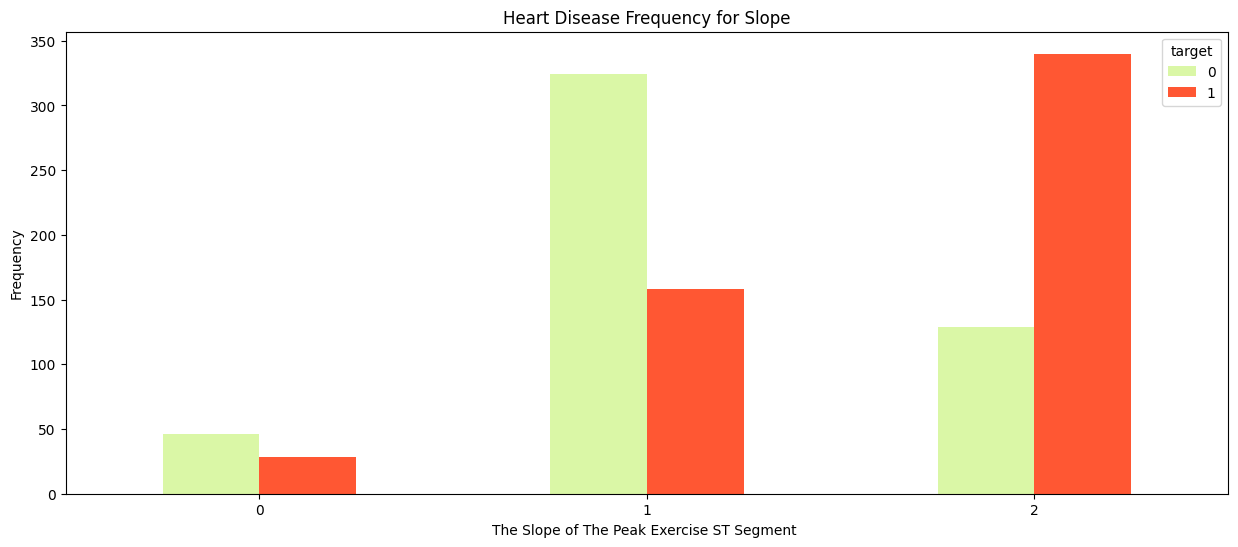

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(15, 6), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

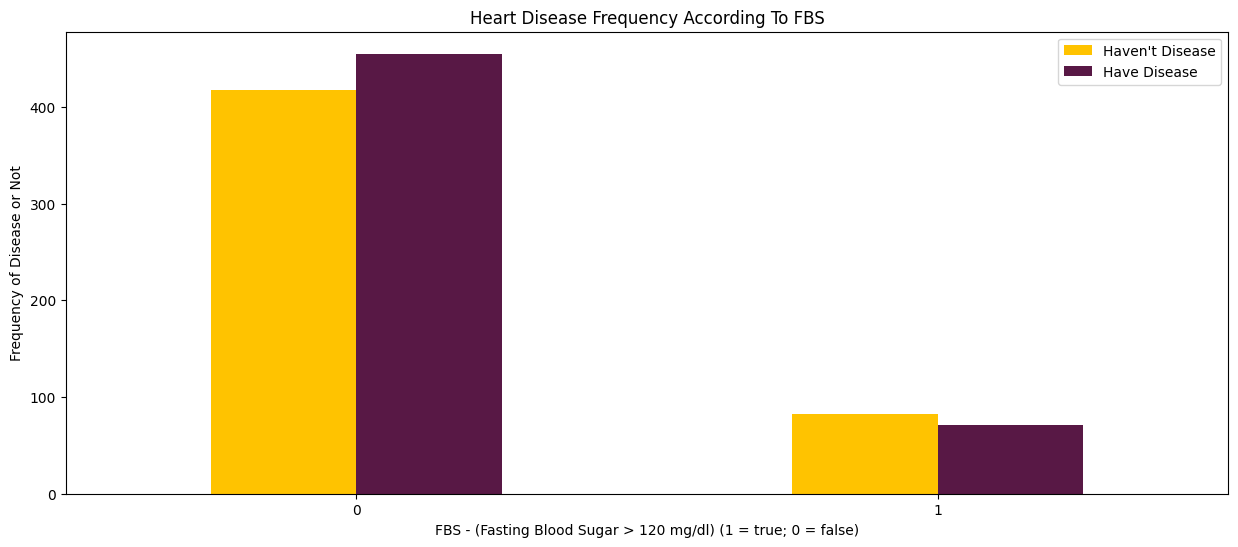

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(15, 6), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

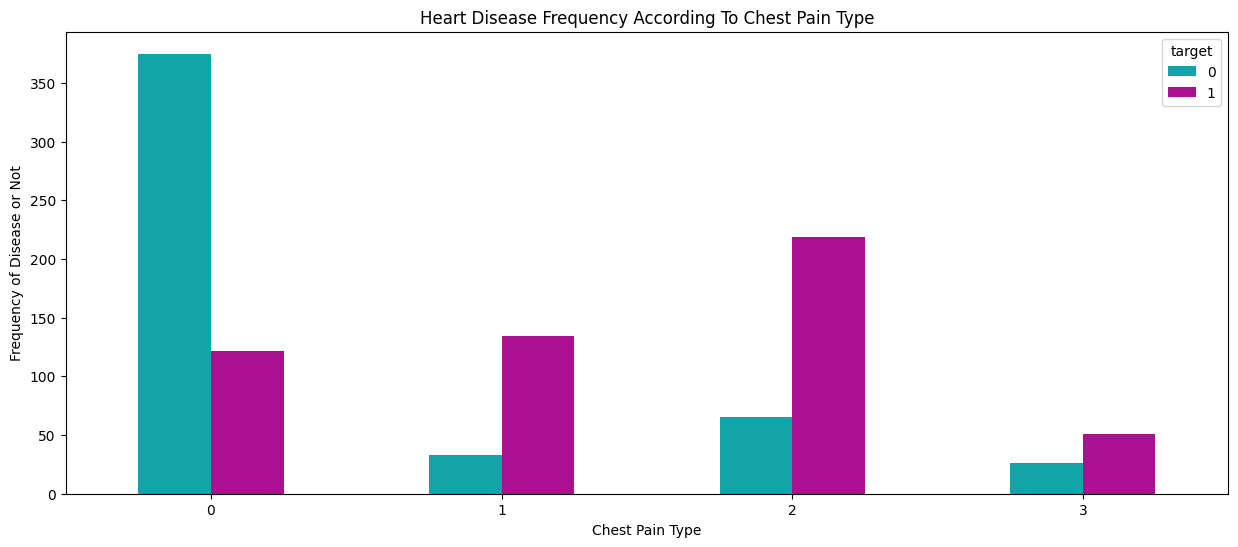

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15, 6), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [ ]:
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


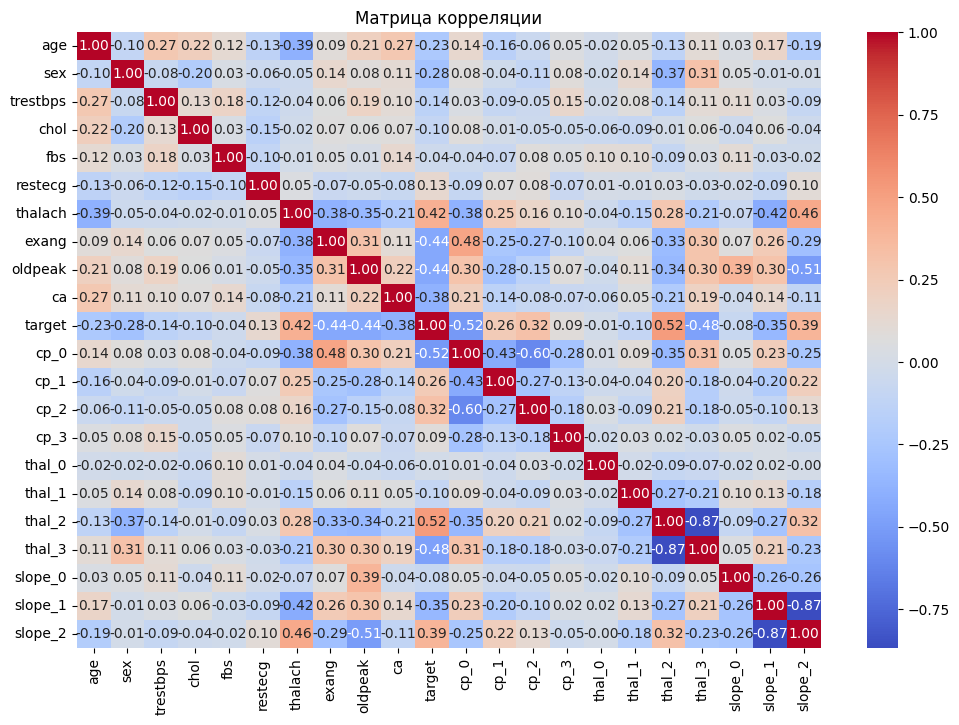

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Матрица корреляции")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X['bias'] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogReg(X_train_scaled.shape[1], learning_rate=0.01, num_iterations=1000, alpha=0.01)
log_reg.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

acc = log_reg.score(X_test_scaled, y_test)

acc

0.7922077922077922

Путем тестирования разных гиперпараметров, оптимальными оказались learning_rate=0.01, num_iterations=1000, alpha=0.01

<Axes: title={'center': 'Confusion Matrix'}>

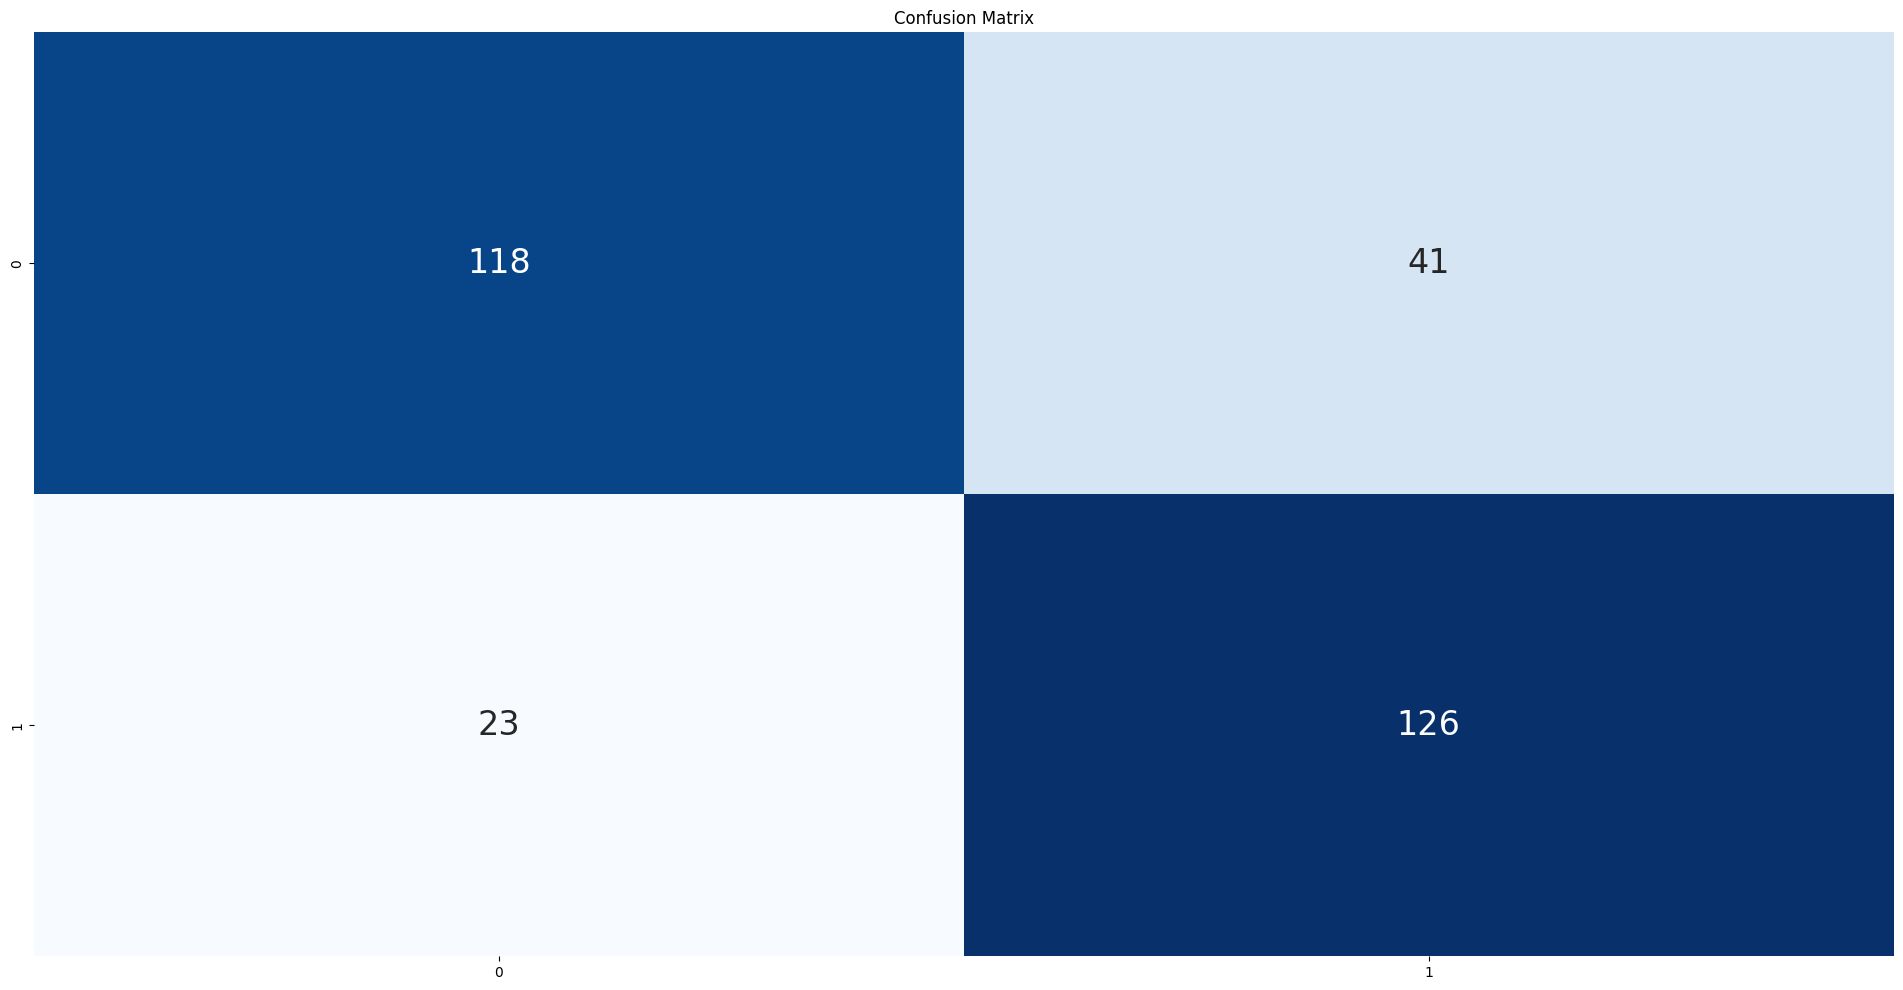

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(24, 12))

plt.title("Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [ ]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = []
    for x in X:
      distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
      k_nearest_indices = np.argsort(distances)[:self.k]
      k_nearest_labels = self.y_train[k_nearest_indices]
      most_common_label = np.bincount(k_nearest_labels).argmax()
      y_pred.append(most_common_label)
    return np.array(y_pred)

  def score(self, X, y):
    y_pred = self.predict(X)
    accuracy = np.sum(y_pred == y) / len(y)
    return accuracy

In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
knn = KNN(k=5)
knn.fit(X_train_scaled, y_train)

y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)
acc = knn.score(X_test_scaled, y_test)

print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.8442


<Axes: title={'center': 'KNN Confusion Matrix'}>

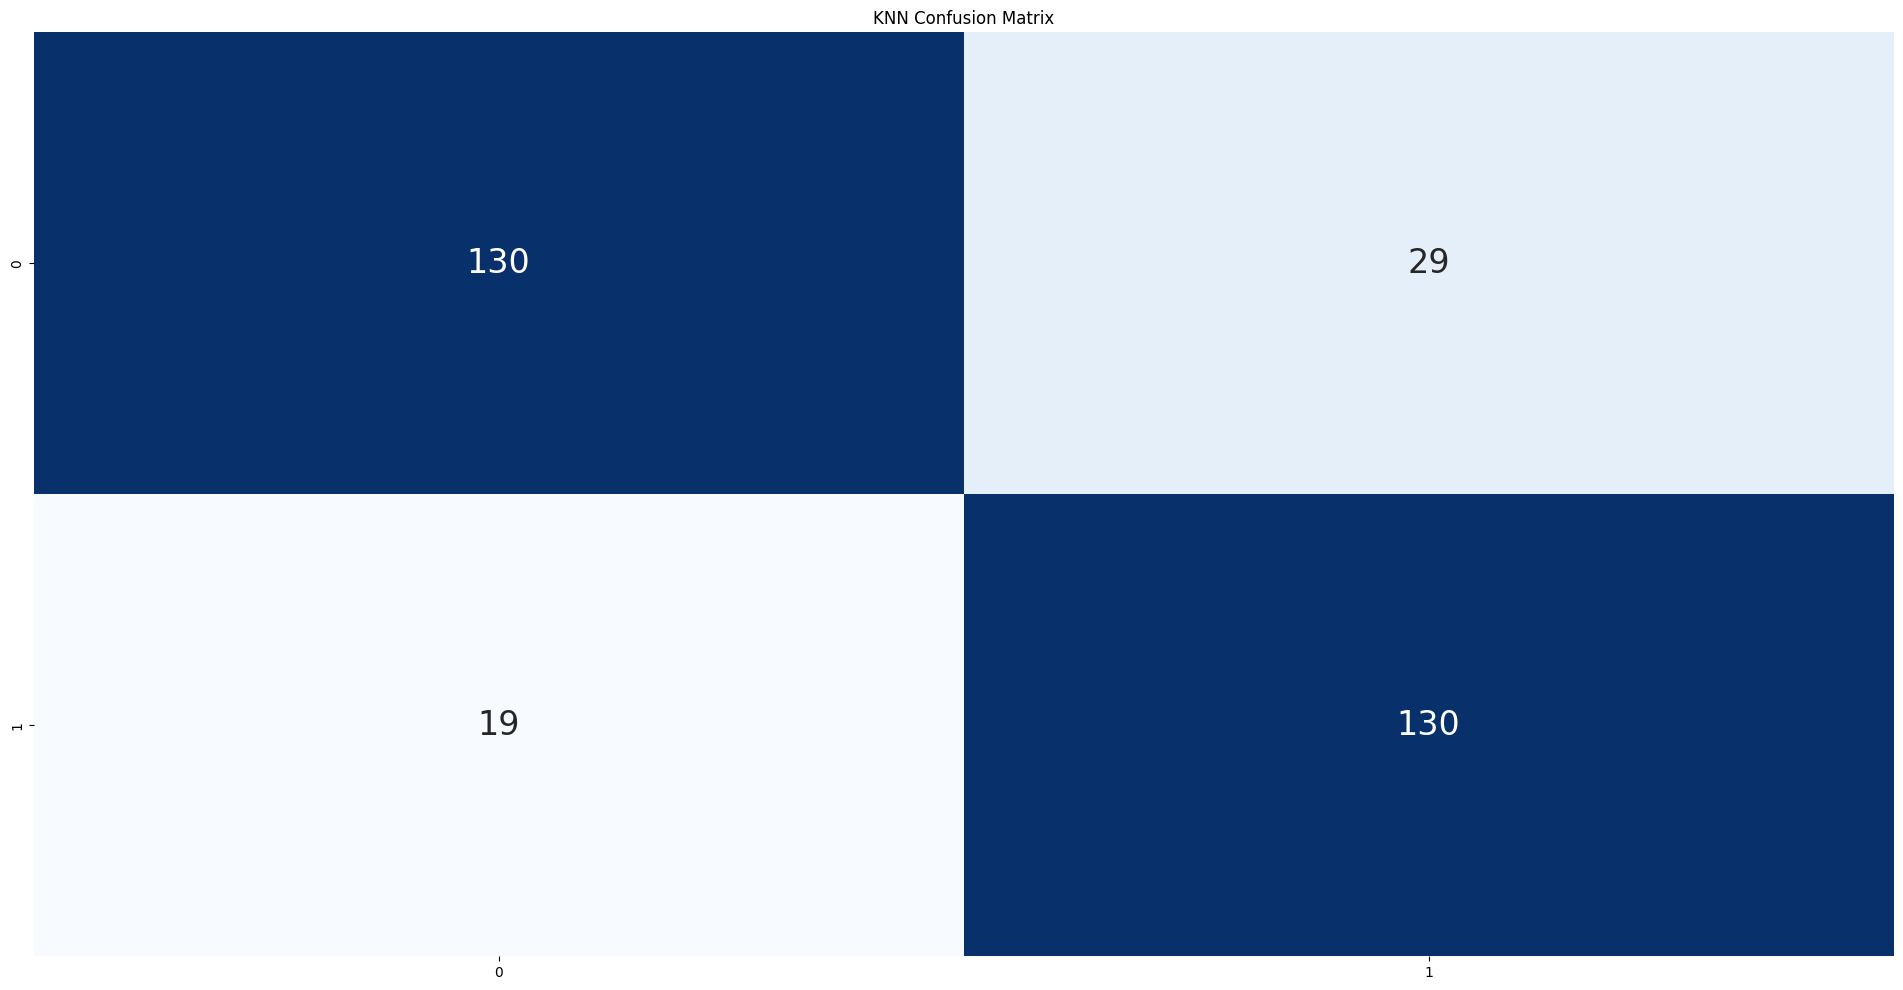

In [ ]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(24, 12))

plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

<Axes: title={'center': 'K Nearest Neighbors Confusion Matrix'}>

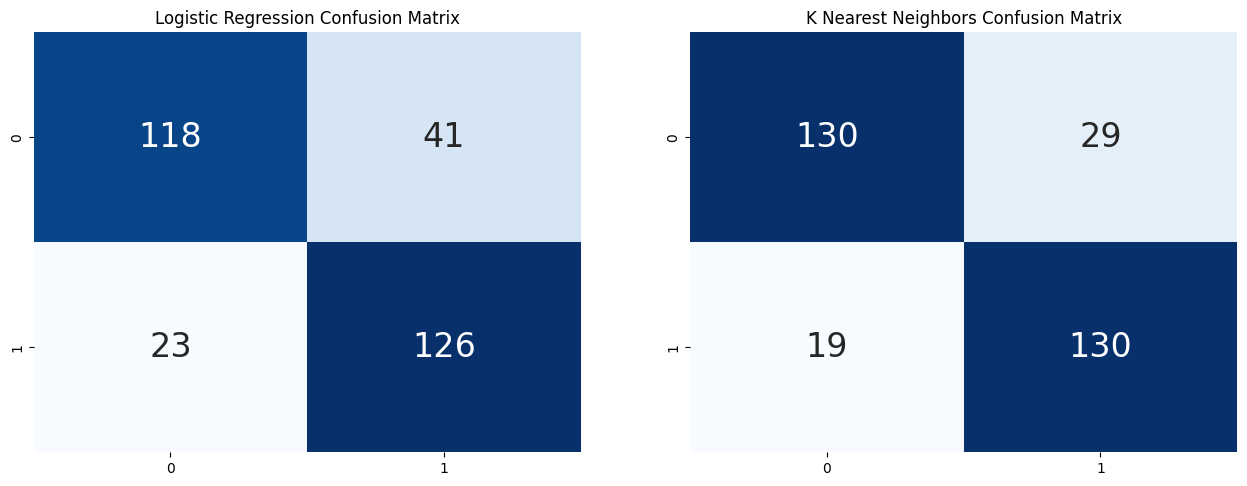

In [ ]:
plt.figure(figsize=(24, 12))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

Теперь попробуем на другом датасете

In [ ]:
df = pd.read_csv('/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop(['id'], axis=1, inplace=True)
df.drop(['work_type'], axis=1, inplace=True)
df.drop(['smoking_status'], axis=1, inplace=True)

In [ ]:
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0, 'Other': 1})
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 0) & (df['age'] <= 25), 'bmi'] = df['bmi'][(df['hypertension'] == 0) & (df['age'] < 25)].mean()
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 0) & (df['age'] > 25), 'bmi'] = df['bmi'][(df['hypertension'] == 0) & (df['age'] > 25)].mean()
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 1) & (df['age'] <= 25), 'bmi'] = df['bmi'][(df['hypertension'] == 1) & (df['age'] < 25)].mean()
df.loc[(df['bmi'].isnull()) & (df['hypertension'] == 1) & (df['age'] > 25), 'bmi'] = df['bmi'][(df['hypertension'] == 1) & (df['age'] > 25)].mean()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['stroke']
X = df.drop(columns=['stroke'])

X['bias'] = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogReg(X_train_scaled.shape[1], learning_rate=0.01, num_iterations=1000, alpha=0.01)
log_reg.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = log_reg.predict(X_train_scaled)
y_test_pred = log_reg.predict(X_test_scaled)

acc = log_reg.score(X_test_scaled, y_test)

acc

0.5799086757990868

<Axes: title={'center': 'Confusion Matrix'}>

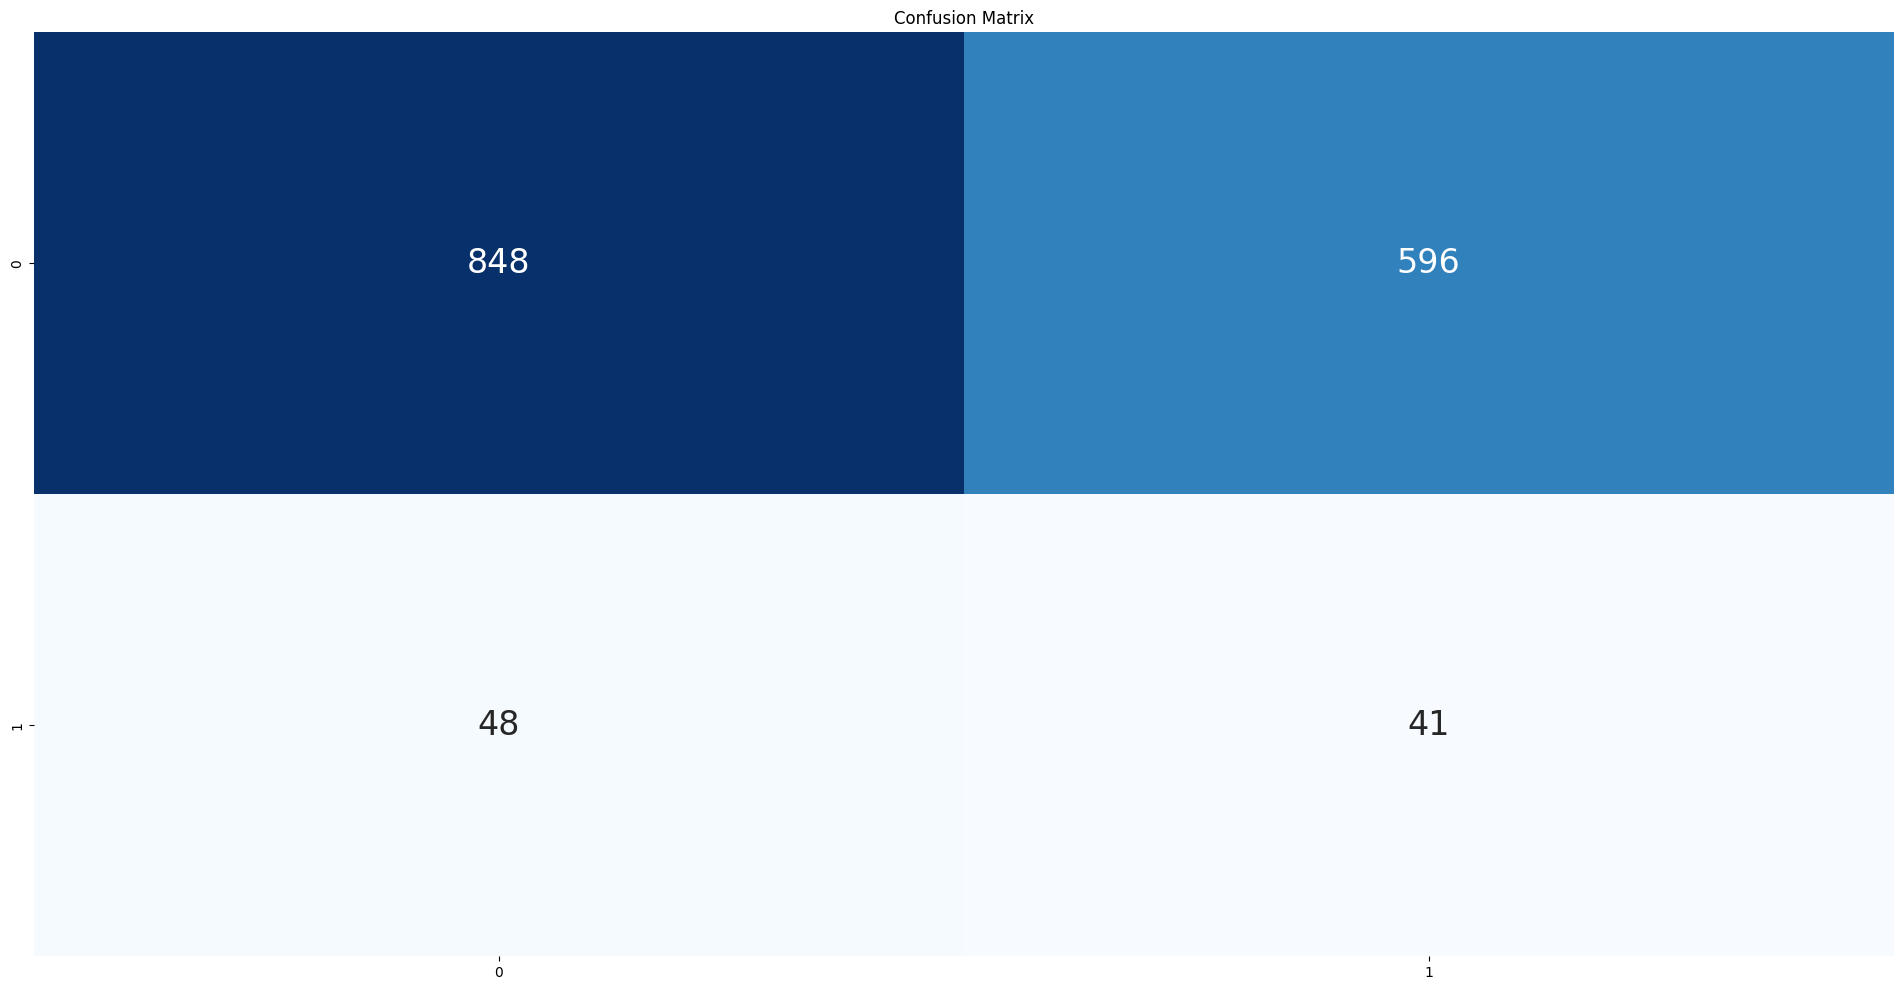

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(24, 12))

plt.title("Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

Как видим, не очень хорошая эффективность на этом датасете

In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
knn = KNN(k=5)
knn.fit(X_train_scaled, y_train)

y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)
acc = knn.score(X_test_scaled, y_test)

print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.9393


<Axes: title={'center': 'KNN Confusion Matrix'}>

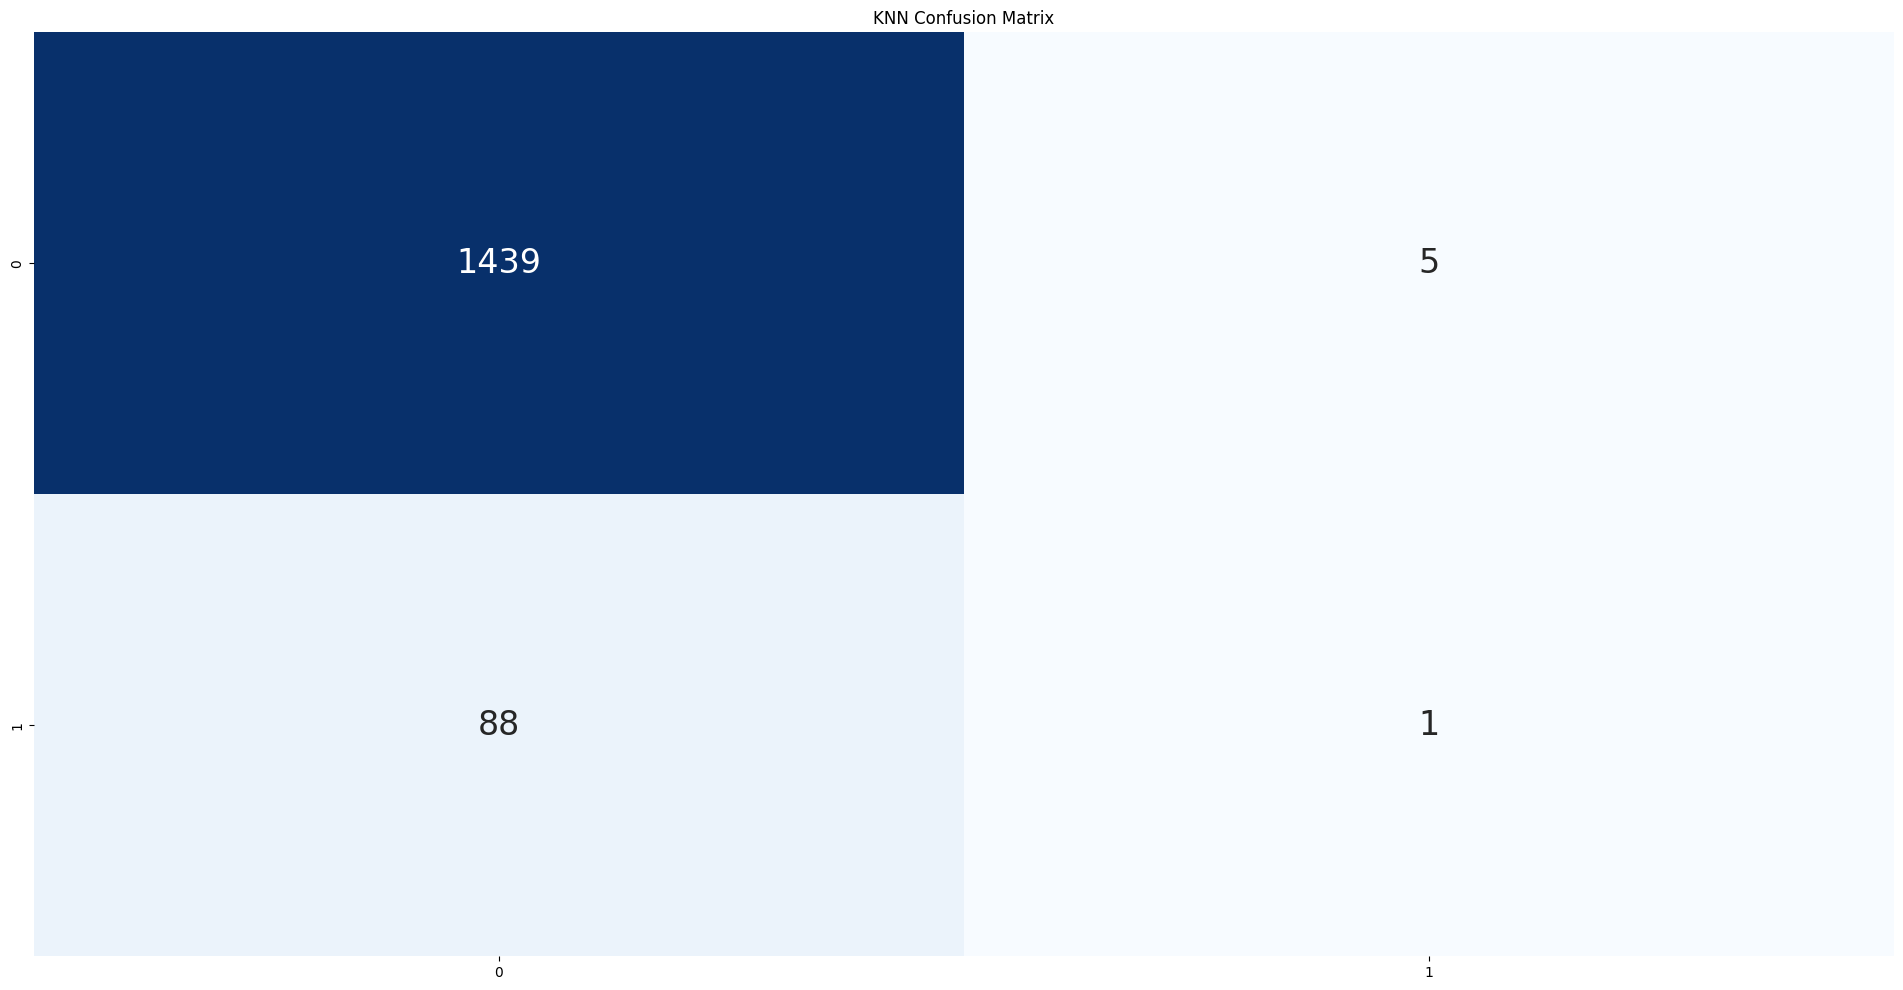

In [ ]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(24, 12))

plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

KNN справился гораздо лучше

<Axes: title={'center': 'K Nearest Neighbors Confusion Matrix'}>

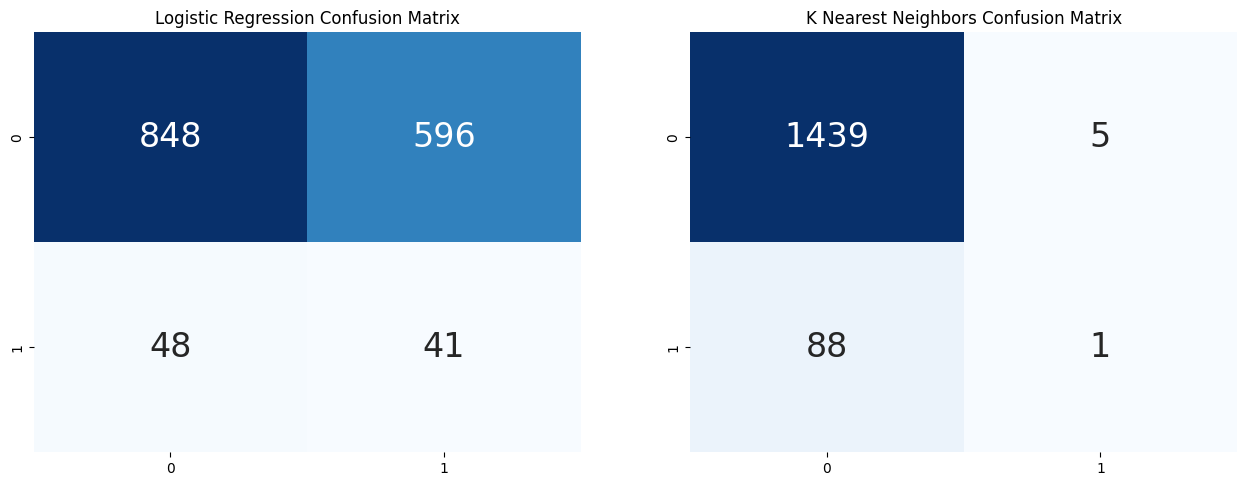

In [ ]:
plt.figure(figsize=(24, 12))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

Теперь, протестируем решения готовых библиотек.

In [ ]:
from sklearn.linear_model import LogisticRegression
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
acc = lr.score(X_test_scaled, y_test)

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.4f}".format(acc))

Test Accuracy 0.9419


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)  # n_neighbors means k
knn.fit(X_train_scaled, y_train)
prediction = knn.predict(X_test_scaled)

print("{} NN Score: {:.4f}".format(3, knn.score(X_test_scaled, y_test)))

3 NN Score: 0.9322


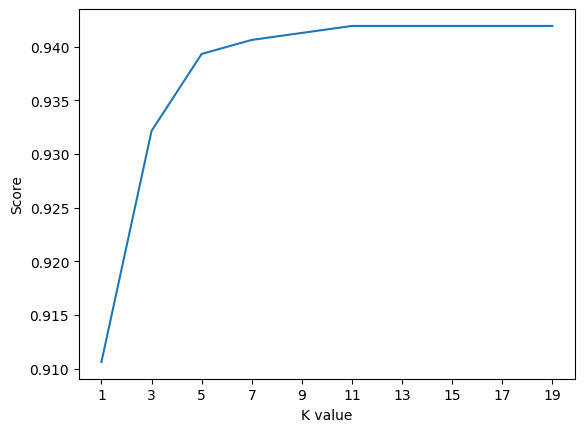

Maximum KNN Score is 0.9419


In [ ]:
scoreList = []
for i in range(1, 20, 2):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train_scaled, y_train)
    scoreList.append(knn2.score(X_test_scaled, y_test))

plt.plot(range(1, 20, 2), scoreList)
plt.xticks(np.arange(1, 20, 2))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.4f}".format(acc))

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state = 12)
svm.fit(X_train_scaled, y_train)

acc = svm.score(X_test_scaled, y_test)
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.4f}".format(acc))

Test Accuracy of SVM Algorithm: 0.9419


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

acc = nb.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.4f}".format(acc))

Accuracy of Naive Bayes: 0.8689


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.4f}".format(acc))

Decision Tree Test Accuracy 0.9126


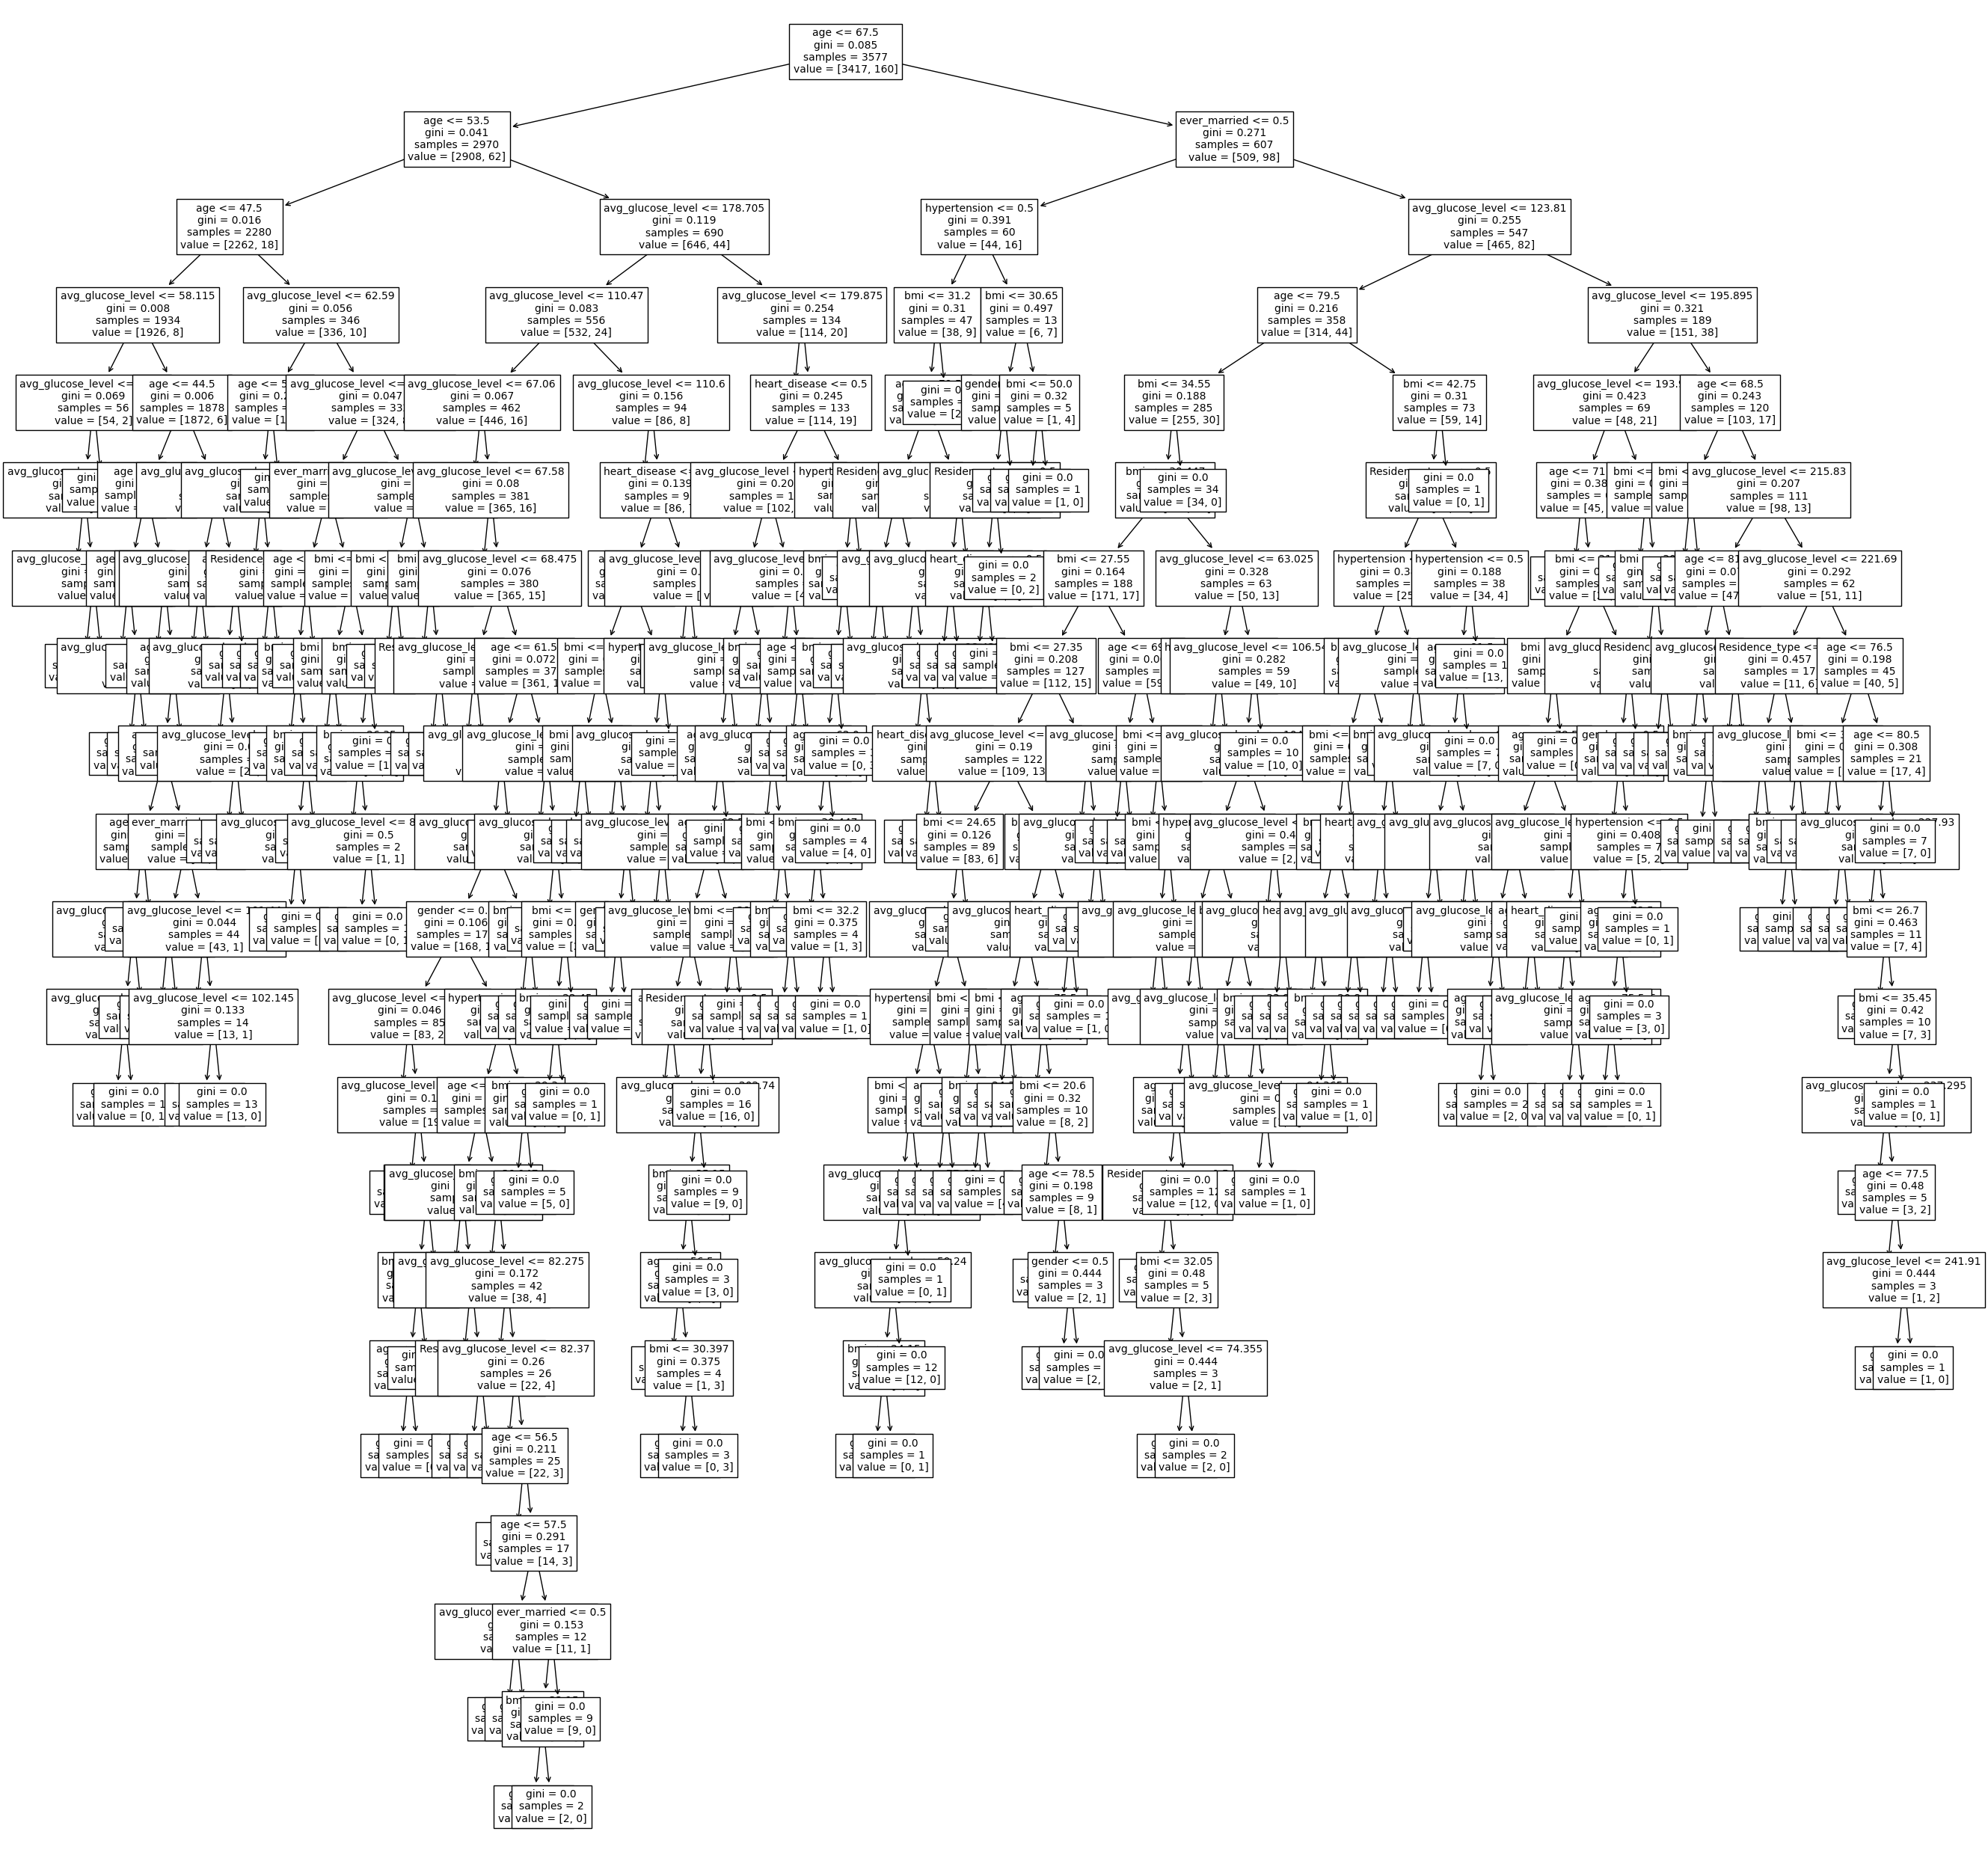

In [ ]:
from sklearn import tree

plt.figure(figsize=(32, 32))
tree.plot_tree(dtc, feature_names=df.columns,fontsize=10);

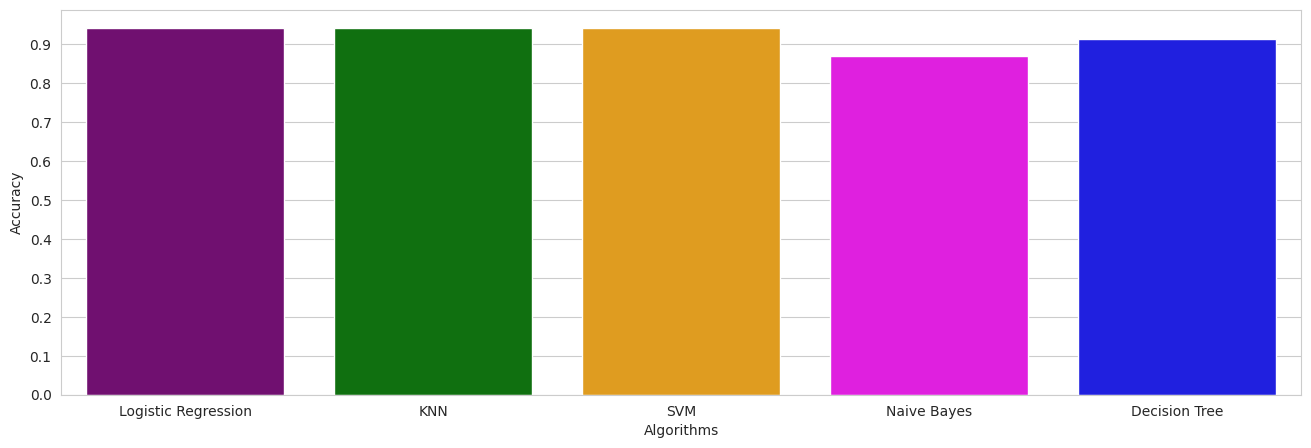

In [ ]:
colors = ["purple", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
# Predicted values
y_head_lr = lr.predict(X_test_scaled)
knn3 = KNeighborsClassifier(n_neighbors = 1)
knn3.fit(X_train_scaled, y_train)
y_head_knn = knn3.predict(X_test_scaled)
y_head_svm = svm.predict(X_test_scaled)
y_head_nb = nb.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)

In [ ]:

from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head_lr)
cm_knn = confusion_matrix(y_test, y_head_knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_nb = confusion_matrix(y_test, y_head_nb)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

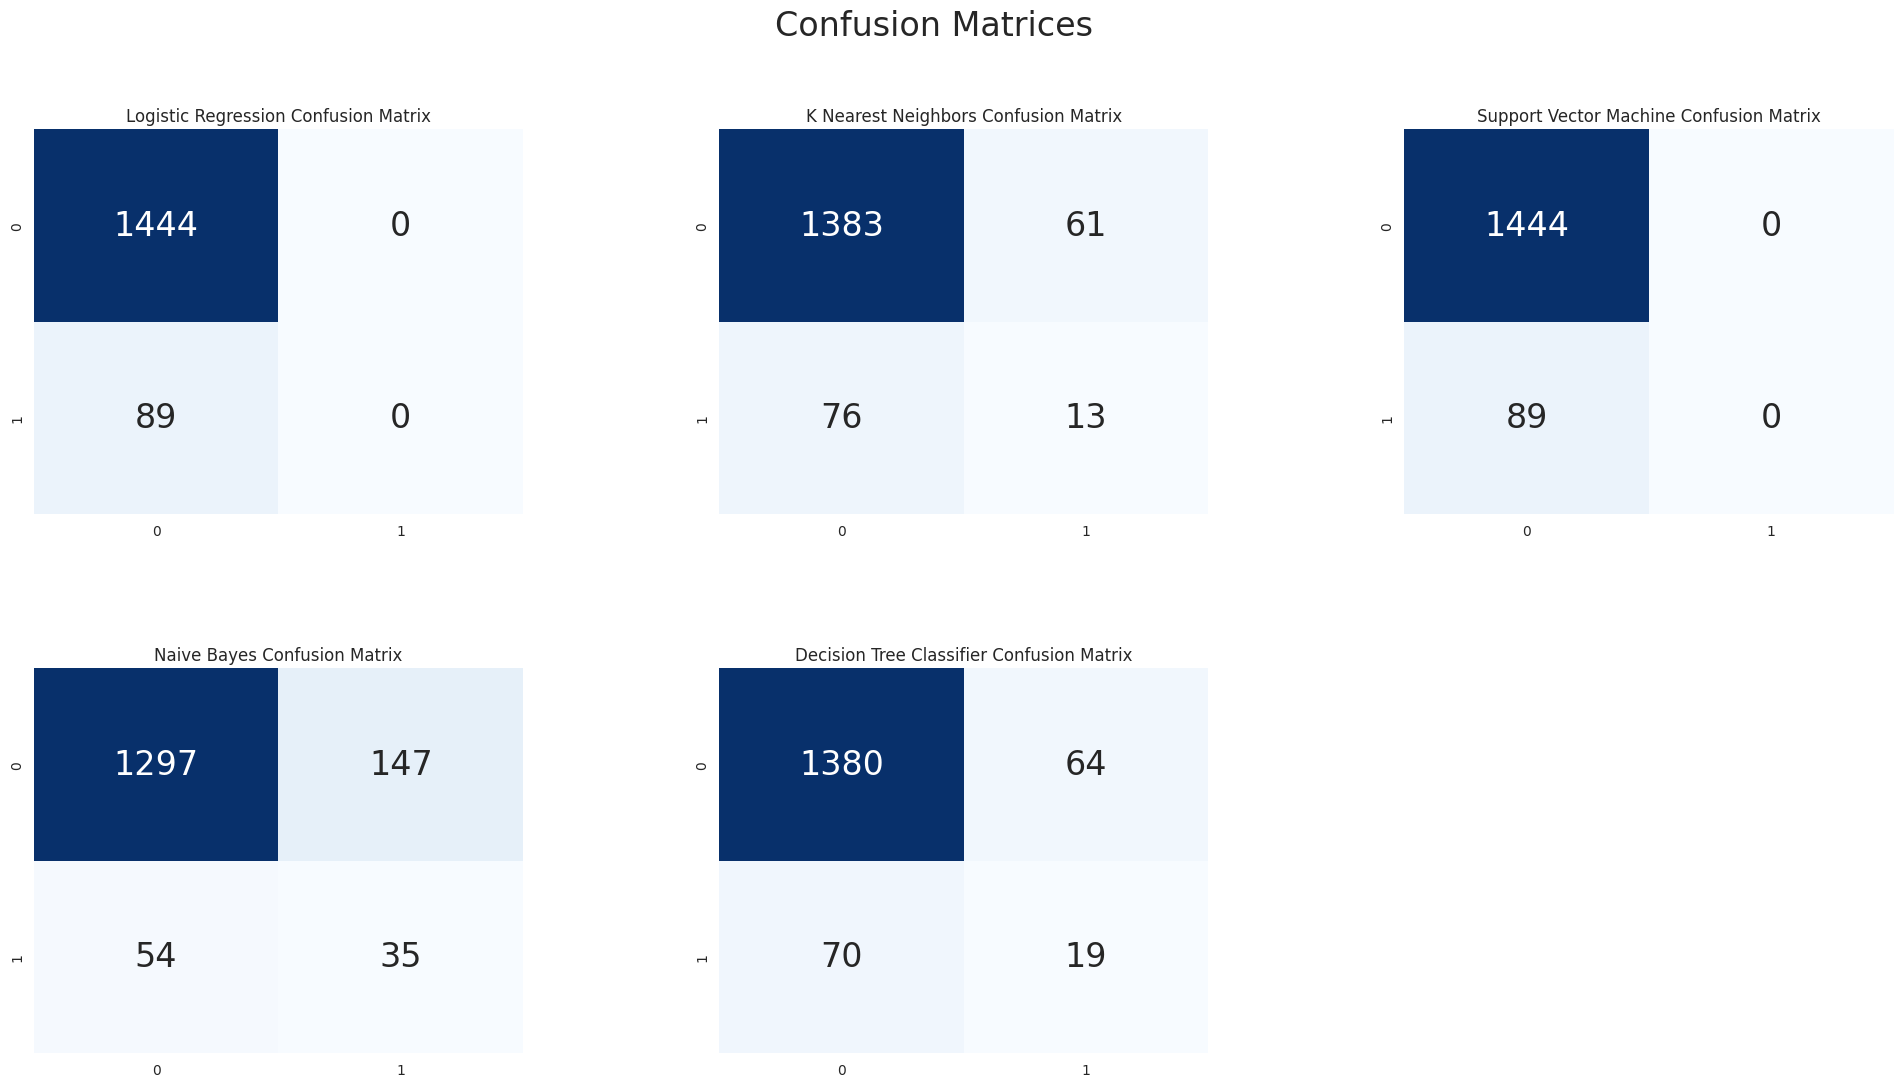

In [ ]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()